# **EDA Analysis of Super Store**
<p>by Ruhit Debnath</p> <br>

-------------------------------------
## Contents:
1. Data Cleaning and Preprocessing
2. Descriptive Analysis of the Data
3. Visualization of the Data
4. Conclusion

## 1. Data Cleaning and Preprocessing

### 1.1. Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



### 1.2. Looking into data by exploring the first five rows and columns of the data set

In [2]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


### 1.3 Checking the rows and colums of the data set

In [3]:
df.shape

(9994, 13)

### 1.4. Checking the data type in data set

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### 1.5. Checking the null values in the data set

In [6]:
df.isnull().sum() 

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

### 1.6. Checking the category of each categorical variable in data set

In [7]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### 1.7. Checking the duplicte values

In [8]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9989    False
9990    False
9991    False
9992    False
9993    False
Length: 9994, dtype: bool

### 1.8. Removing the duplicates values

In [9]:
df = pd.DataFrame.drop_duplicates(df)
df.shape

(9977, 13)

### 1.9. Removing the unnecessary columns

In [10]:
df = df.drop(['Country'], axis = 1)
df = df.drop(['Postal Code'], axis = 1)

## 2. Descriptive Analysis of the Data

### 2.1. Checking the Mean, Median, Mode of the numerical values of the data set 

In [22]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


### 2.2 Checking for Correlations

In [32]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


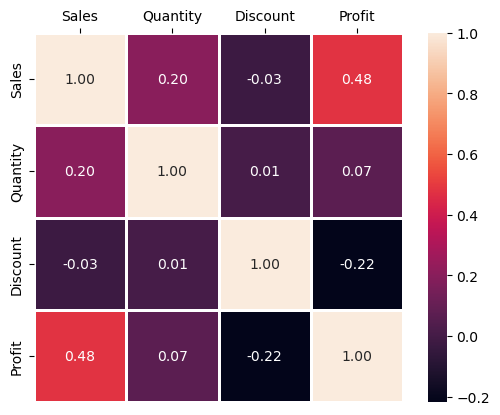

In [37]:
ax=sns.heatmap(df.corr(),annot=True,cbar=True,square=True,linecolor="white",linewidths=1,xticklabels="auto",yticklabels="auto",fmt=".2f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

### 2.3. Total Sales, Total Quantity & Total Profir figure

In [11]:
#to find the total sales
print("Total Sales:" + str(round(sum(df['Sales']))))
#total quantity sold
print("Total Quantity:" + str(sum(df['Quantity'])))
#total profit
print("Total Profit:" + str(round(sum(df['Profit']))))

Total Sales:2296196
Total Quantity:37820
Total Profit:286241


## 3. Visualization of the Data

### 3.1. Mode of Shipment

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

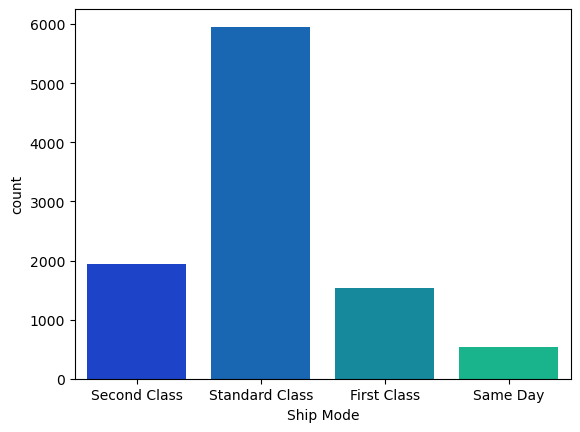

In [26]:
sns.countplot(x=df['Ship Mode'],palette='winter')

### 3.2. Profit & Sale on basis of Ship Mode

Text(0, 0.5, 'Sales')

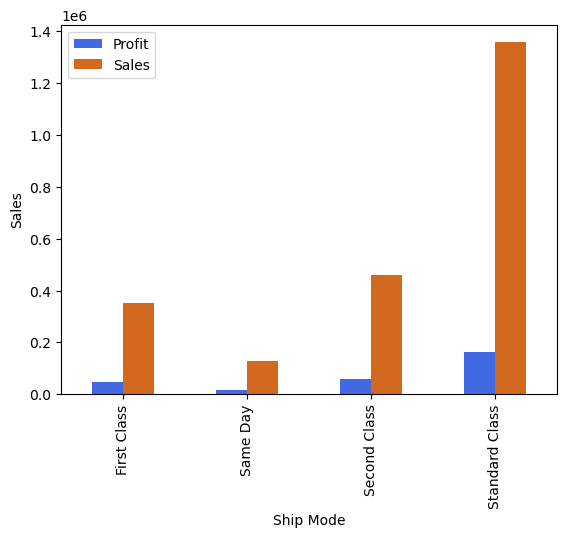

In [13]:
df.groupby('Ship Mode')[['Profit', 'Sales']].sum().plot.bar(color=['royalblue','chocolate'])
plt.ylabel('Sales')

### 3.3. Distribution of Sales on the basis of Category

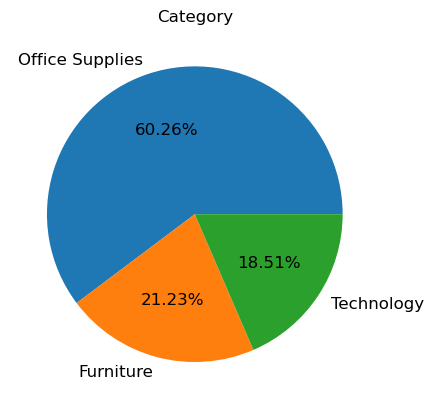

In [14]:
tp = {'fontsize': 12}
plt.title("Category")
#piechart is in matplotlib
plt.pie(df['Category'].value_counts(), labels = df['Category'].value_counts().index, autopct='%1.2f%%', textprops=tp)
plt.show()

### 3.4. Profit & Sale on the basis of Category

<AxesSubplot:xlabel='Category'>

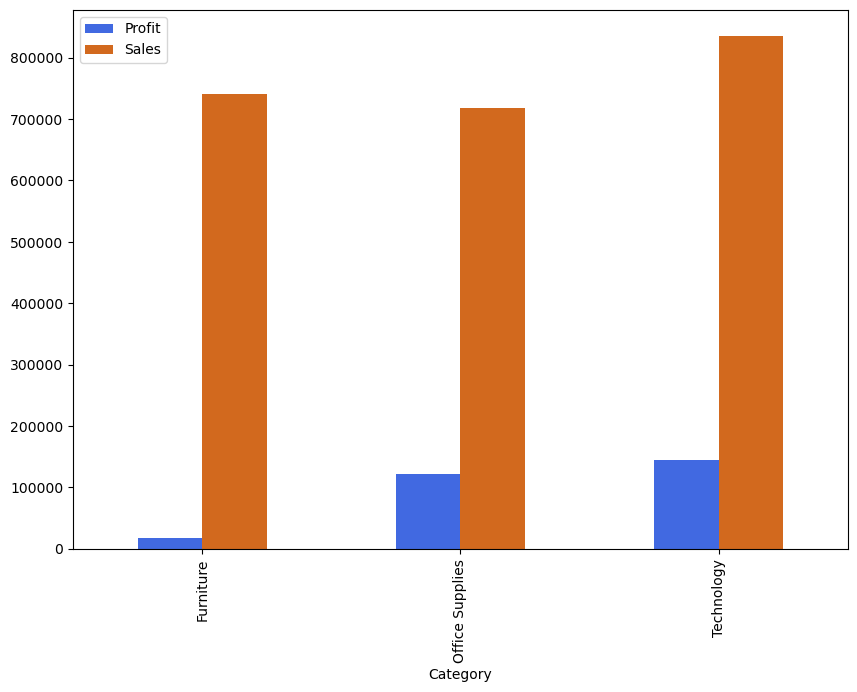

In [15]:
df.groupby('Category')[['Profit', 'Sales']].sum().plot.bar(color=['royalblue', 'chocolate'], figsize=(10, 7))


### 3.5. Profit & Sale on the basis of Sub-Category

<AxesSubplot:xlabel='Sub-Category'>

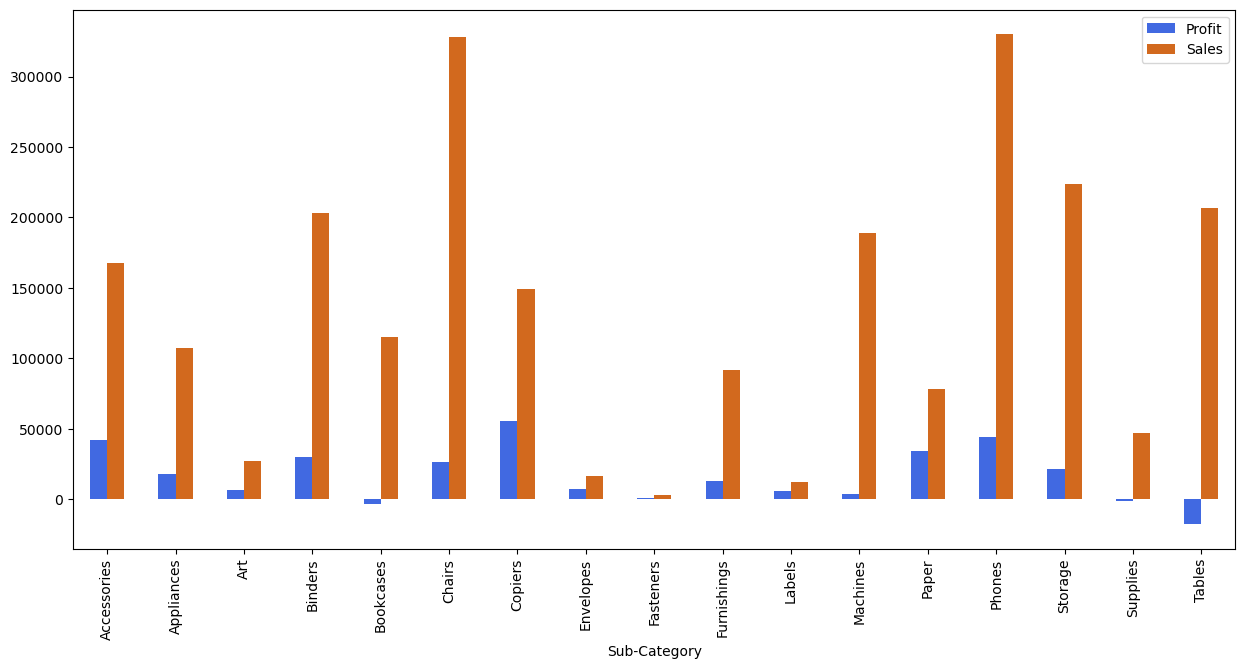

In [16]:
df.groupby('Sub-Category')[['Profit', 'Sales']].sum().plot.bar(color=['royalblue', 'chocolate'], figsize=(15, 7))

### 3.6. Profit in Sub-Category wise

Text(0.5, 0, 'Profit($)')

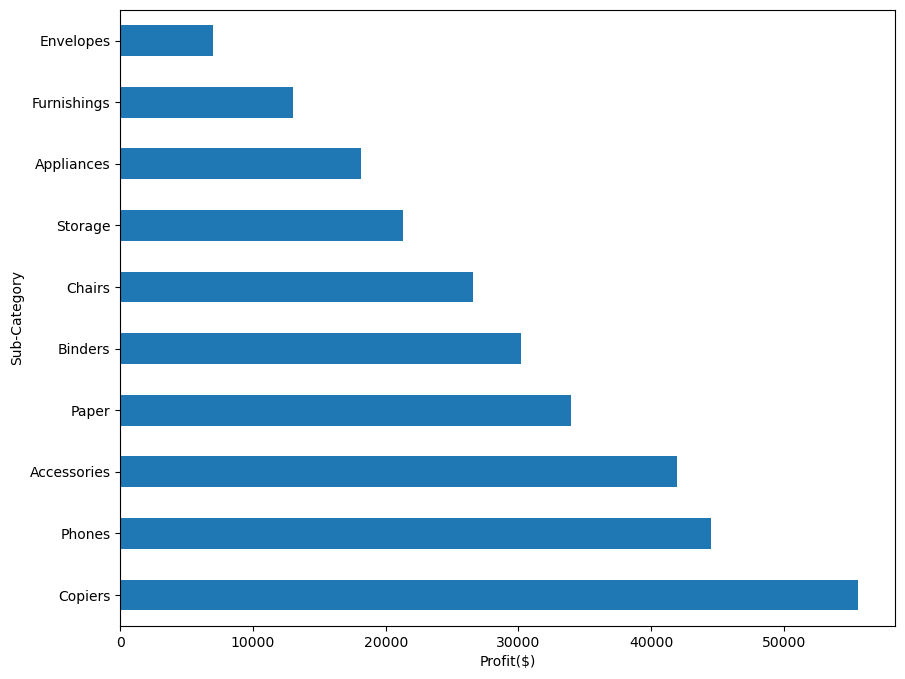

In [17]:
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(10)
statewise.plot.barh(figsize=(10,8))
plt.xlabel('Profit($)')

### 3.7. State wise number of order

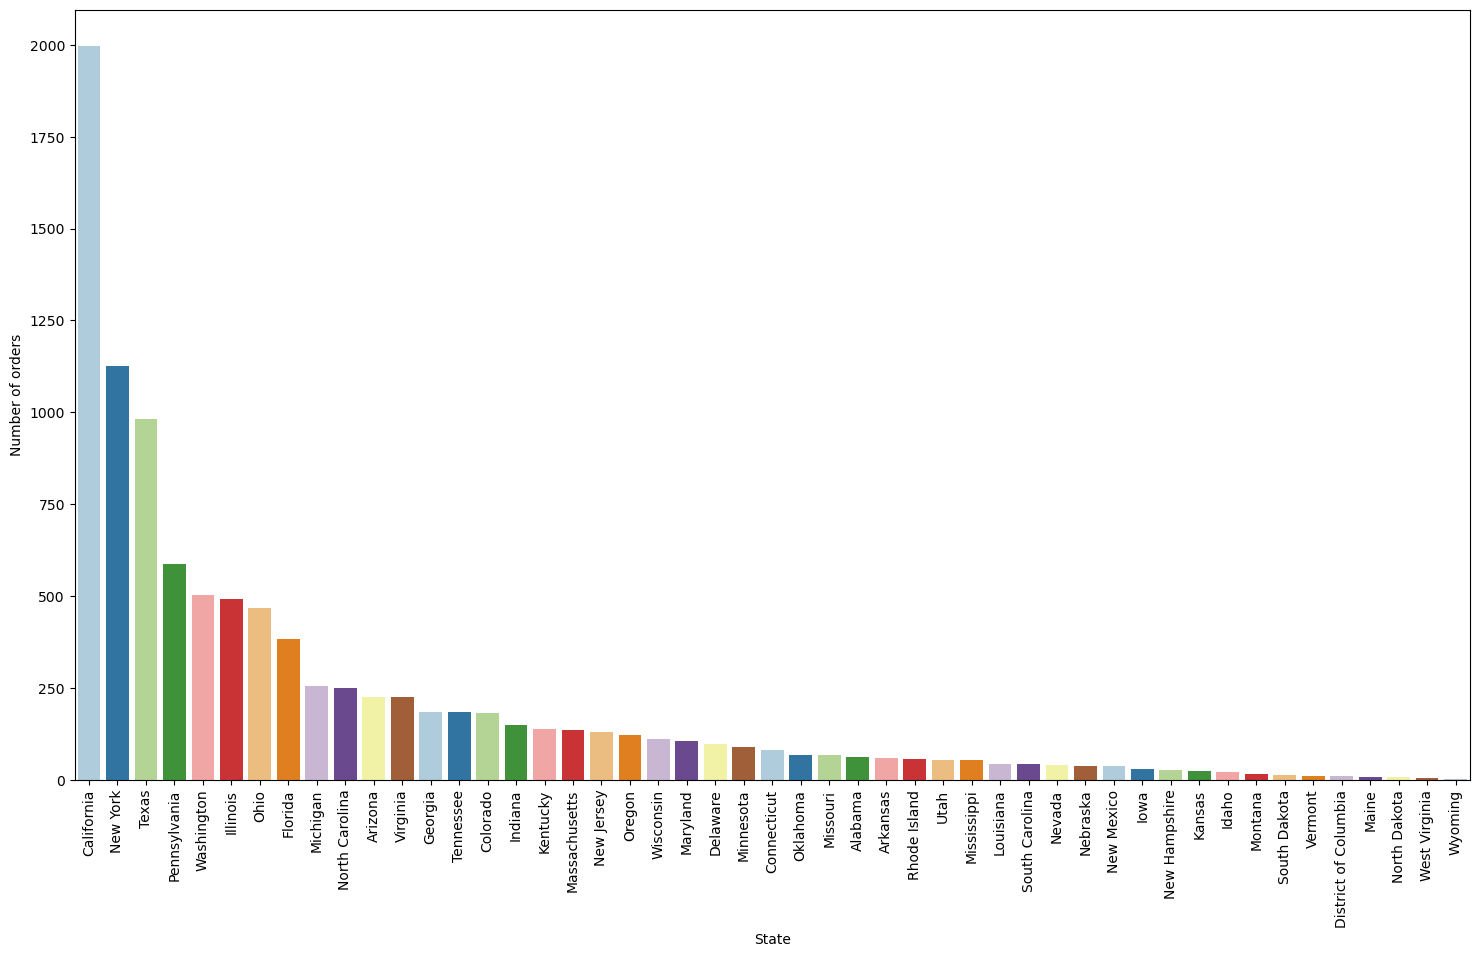

In [31]:
plt.figure(figsize=(18,10))
sns.countplot(x="State", data=df, palette='Paired', order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Number of orders')
plt.show()

### 3.8. Profit & sale figure Segment wise

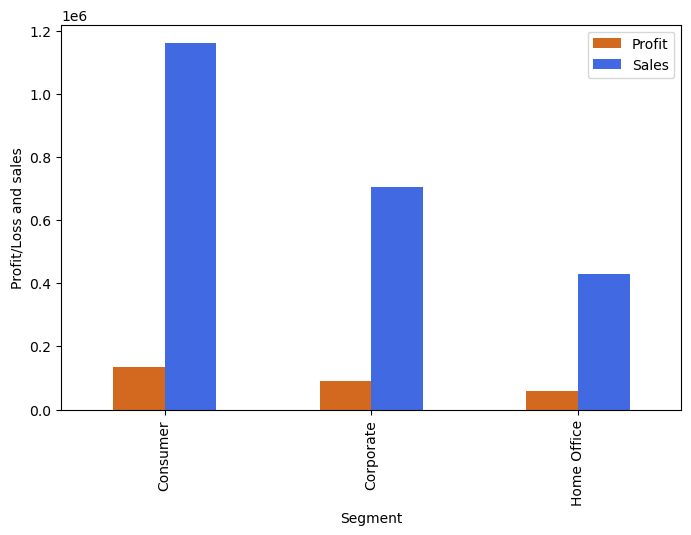

In [19]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(color=['chocolate','royalblue'], figsize=(8,5))
plt.ylabel('Profit/Loss and sales')
plt.show()

### 3.9. Profit and sale region wise

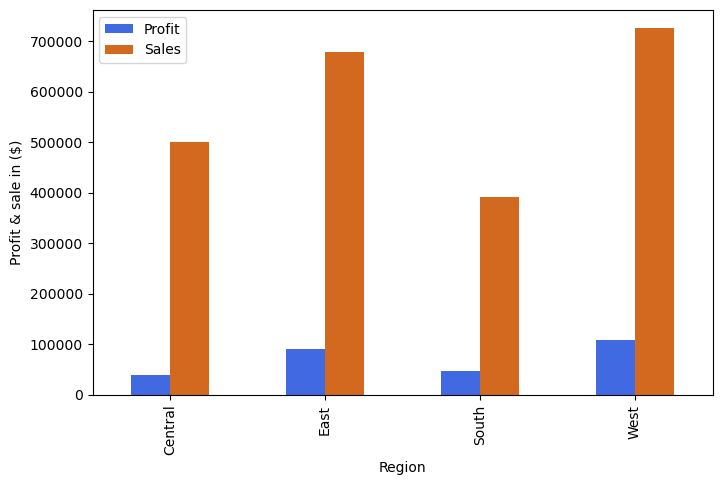

In [20]:
df.groupby('Region')[['Profit','Sales']].sum().plot.bar(color=['royalblue','chocolate'], figsize=(8,5))
plt.ylabel('Profit & sale in ($)')
plt.show()


### 3.10. Region wise Mode of shipment

Text(0.5, 1.0, 'Count of ship mode by region and ship mode')

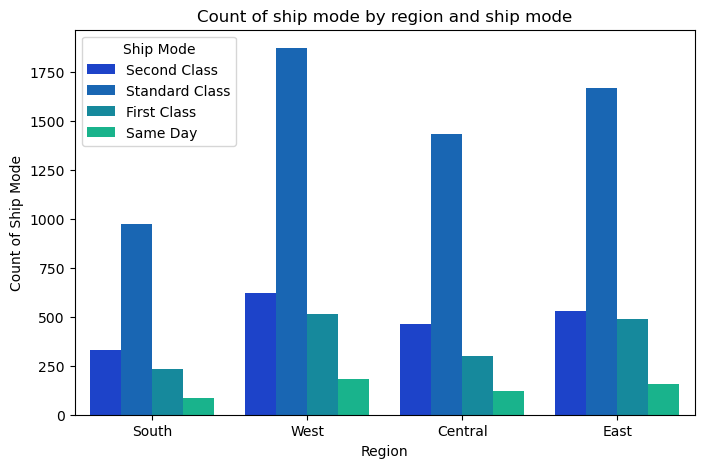

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(x='Region',hue='Ship Mode',data=df,palette='winter')
plt.ylabel('Count of Ship Mode')
plt.title('Count of ship mode by region and ship mode')

## 4. Conclusion:

- Shipment method used in each region is mostly Standard class, so obviously there is maximum sale in this shipment method.
- Maximum category is of office suppliers where as maximum sale and profit is in technology.
- There is maximum sale in phone category whereas maximum profit in Chairs category.
- Maximum order is in California that is around 2000.
- Highest sale and profit is in Consumer segment as compared to corporate and home office.
- Highest sale in West region as compared to other region, Standard class is used in each region where as First class is same in West and East.
- There is a negative profit in Tables.